In [27]:
#Importar bibliotecas para uso do Iris Dataset e as métricas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
#Carregar o Iris Dataset
iris = load_iris()

#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [29]:
#Importar as bibliotecas para a árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
#Inicializando listas para armazenar os resultados
depths = [2, 3, 5, 10]
results = []

#Testar diferentes valores no max_depth
for depth in depths:
    model_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    model_gini.fit(X_train, y_train)
    y_pred_gini = model_gini.predict(X_test)
    accuracy_gini = accuracy_score(y_test, y_pred_gini)
    print("Profundidade da Árvore gini:", depth)
    print("Acurácia gini:", accuracy_score(y_test, y_pred_gini))
    print("Matriz de Confusão gini:\n", confusion_matrix(y_test, y_pred_gini))
    print("Relatório de Classificação gini:\n", classification_report(y_test, y_pred_gini))
    results.append((f'gini, max_depth={depth}', accuracy_gini))
    print("-------------------------------------------------------------")

Profundidade da Árvore gini: 2
Acurácia gini: 0.9777777777777777
Matriz de Confusão gini:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Relatório de Classificação gini:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

-------------------------------------------------------------
Profundidade da Árvore gini: 3
Acurácia gini: 1.0
Matriz de Confusão gini:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação gini:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                  

In [31]:
#Testar com critério 'entropy'
for depth in depths:
    model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model_entropy.fit(X_train, y_train)
    y_pred_entropy = model_entropy.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
    print("Profundidade da Árvore entropy:", depth)
    print("Acurácia entropy:", accuracy_score(y_test, y_pred_entropy))
    print("Matriz de Confusão entropy:\n", confusion_matrix(y_test, y_pred_entropy))
    print("Relatório de Classificação entropy:\n", classification_report(y_test, y_pred_entropy))
    results.append((f'gini, max_depth={depth}', accuracy_entropy))
    print("-------------------------------------------------------------")

Profundidade da Árvore entropy: 2
Acurácia entropy: 1.0
Matriz de Confusão entropy:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação entropy:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

-------------------------------------------------------------
Profundidade da Árvore entropy: 3
Acurácia entropy: 1.0
Matriz de Confusão entropy:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação entropy:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy         

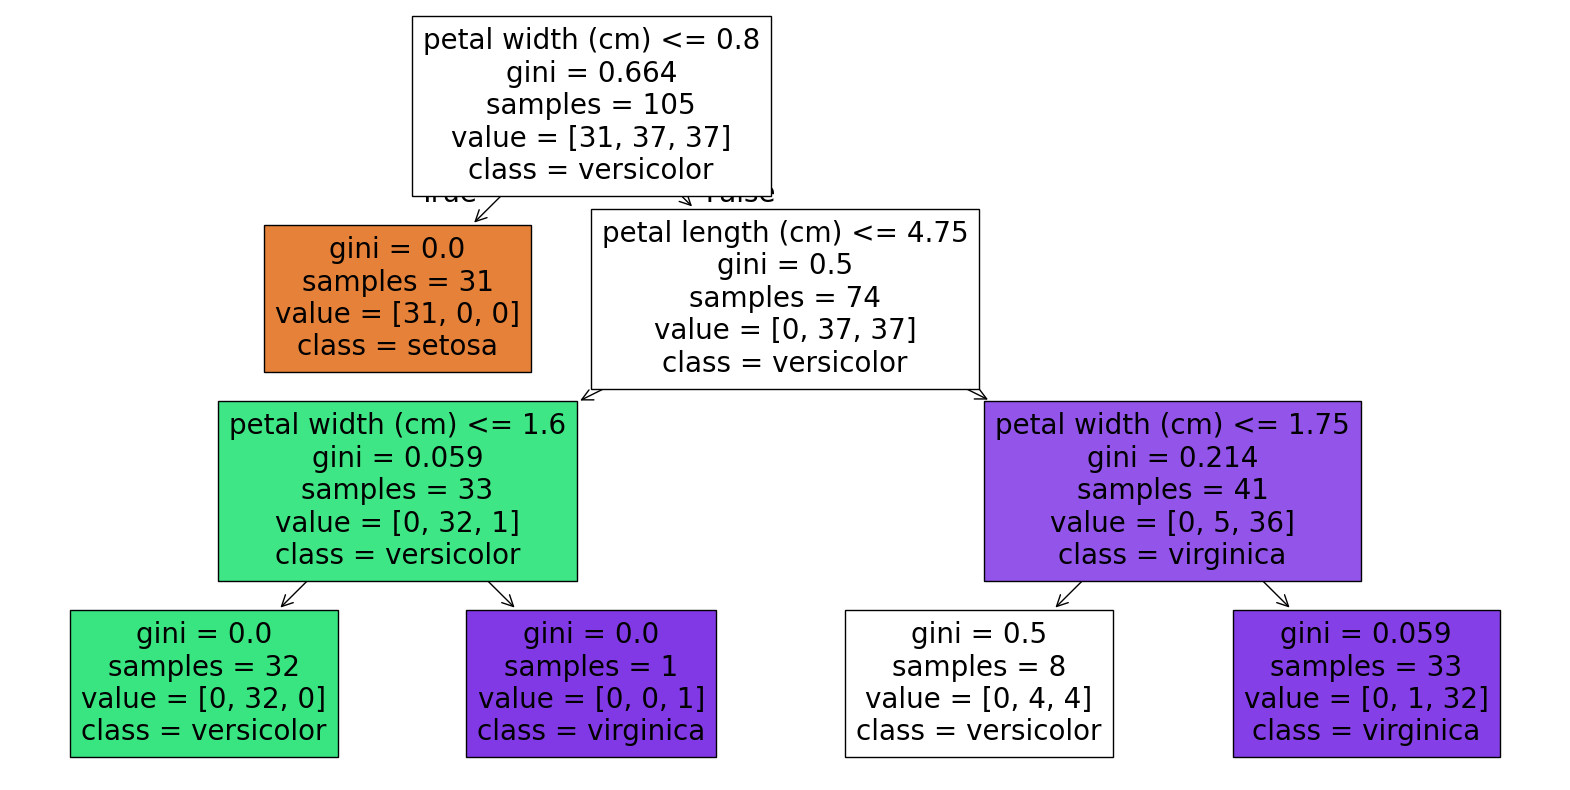

In [32]:
#Visualizar a árvore gerada para a melhor configuração
best_depth = max(results, key=lambda x: x[1])[0].split('=')[1]
best_criterion = 'gini' if 'gini' in max(results, key=lambda x: x[1])[0] else 'entropy'
model_best = DecisionTreeClassifier(criterion=best_criterion, max_depth=int(best_depth))
model_best.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(model_best, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [36]:
#Comparando árvore de decisão com o modelo k-NN.
#Importar o modelo de classificação k-NN
from sklearn.neighbors import KNeighborsClassifier

#Lista de valores de k para testar
neighbors_values = [2, 3, 5, 10]

#Inicializar uma lista para armazenar os resultados
knn_results = []

#Testar diferentes valores de k
for k in neighbors_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print("Profundidade da Árvore k-NN:", k)
    print("Acurácia k-NN:", accuracy_score(y_test, y_pred_knn))
    print("Matriz de Confusão k-NN:\n", confusion_matrix(y_test, y_pred_knn))
    print("Relatório de Classificação k-NN:\n", classification_report(y_test, y_pred_knn))
    knn_results.append((f'n_neighbors={n}', accuracy_knn))
    print("-------------------------------------------------------------")

Profundidade da Árvore k-NN: 2
Acurácia k-NN: 1.0
Matriz de Confusão k-NN:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação k-NN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

-------------------------------------------------------------
Profundidade da Árvore k-NN: 3
Acurácia k-NN: 1.0
Matriz de Confusão k-NN:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação k-NN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00  